In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Randomize the training data.

In [2]:
np.random.seed(0)
X = np.random.random(size=(100, 1))
y = 2 * X.squeeze() + 1 + np.random.normal(size=100)

Estimate the parameters.

In [3]:
est = LinearRegression(fit_intercept=True)
est.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
print 'Model coefficient: %f' % est.coef_
print 'Intercept: %f' % est.intercept_

Model coefficient: 1.936935
Intercept: 1.222151


Generate some test data.

In [5]:
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = est.predict(X_test)

Plot the resutls.

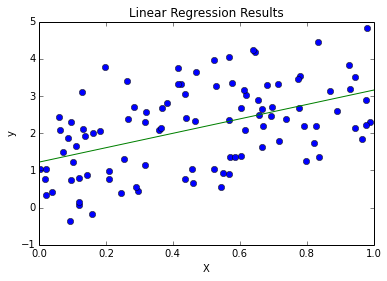

In [8]:
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test)
plt.title('Linear Regression Results')
plt.xlabel('X')
plt.ylabel('y')
plt.show()